In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)


# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    
    
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key



In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | utiroa
City not found. Skipping...
Processing Record 2 of Set 13 | dikson
Processing Record 3 of Set 13 | ushuaia
Processing Record 4 of Set 13 | barrow
Processing Record 5 of Set 13 | jamestown
Processing Record 6 of Set 13 | vaini
Processing Record 7 of Set 13 | iqaluit
Processing Record 8 of Set 13 | souillac
Processing Record 9 of Set 13 | mataura
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | clyde river
Processing Record 12 of Set 13 | deniliquin
Processing Record 13 of Set 13 | kota belud
Processing Record 14 of Set 13 | hobart
Processing Record 15 of Set 13 | port lincoln
Processing Record 16 of Set 13 | castro
Processing Record 17 of Set 13 | acapulco
Processing Record 18 of Set 13 | pimentel
Processing Record 19 of Set 13 | hilo
Processing Record 20 of Set 13 | cape town
Processing Record 21 of Set 13 | callaway
Processing Record

Processing Record 31 of Set 16 | simao
Processing Record 32 of Set 16 | nikolskoye
Processing Record 33 of Set 16 | sena madureira
Processing Record 34 of Set 16 | nome
Processing Record 35 of Set 16 | isla vista
Processing Record 36 of Set 16 | ancud
Processing Record 37 of Set 16 | sokolo
Processing Record 38 of Set 16 | high level
Processing Record 39 of Set 16 | chama
Processing Record 40 of Set 16 | shenjiamen
Processing Record 41 of Set 16 | chapais
Processing Record 42 of Set 16 | pachino
Processing Record 43 of Set 16 | faanui
Processing Record 44 of Set 16 | mayo
Processing Record 45 of Set 16 | sao filipe
Processing Record 46 of Set 16 | amanpur
Processing Record 47 of Set 16 | vestmannaeyjar
Processing Record 48 of Set 16 | cruz grande
Processing Record 49 of Set 16 | mount gambier
Processing Record 50 of Set 16 | cayenne
Processing Record 1 of Set 17 | hit
Processing Record 2 of Set 17 | bethel
Processing Record 3 of Set 17 | cockburn town
Processing Record 4 of Set 17 | pr

Processing Record 22 of Set 20 | kiama
Processing Record 23 of Set 20 | san cristobal
Processing Record 24 of Set 20 | buariki
City not found. Skipping...
Processing Record 25 of Set 20 | tilichiki
Processing Record 26 of Set 20 | plouzane
Processing Record 27 of Set 20 | banda aceh
Processing Record 28 of Set 20 | marienburg
Processing Record 29 of Set 20 | catamarca
Processing Record 30 of Set 20 | broken hill
Processing Record 31 of Set 20 | antalaha
Processing Record 32 of Set 20 | calama
Processing Record 33 of Set 20 | bereda
Processing Record 34 of Set 20 | grandview
Processing Record 35 of Set 20 | ewa beach
Processing Record 36 of Set 20 | kyren
Processing Record 37 of Set 20 | muzhi
Processing Record 38 of Set 20 | kahului
Processing Record 39 of Set 20 | lewisporte
Processing Record 40 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 20 | novonukutskiy
Processing Record 42 of Set 20 | ust-uda
Processing Record 43 of Set 20 | stornoway
Processing R

Processing Record 8 of Set 24 | atwater
Processing Record 9 of Set 24 | biryusinsk
Processing Record 10 of Set 24 | omboue
Processing Record 11 of Set 24 | ouallam
Processing Record 12 of Set 24 | dunda
Processing Record 13 of Set 24 | tak
Processing Record 14 of Set 24 | grants
Processing Record 15 of Set 24 | mrirt
City not found. Skipping...
Processing Record 16 of Set 24 | pandrup
Processing Record 17 of Set 24 | skanderborg
Processing Record 18 of Set 24 | kukmor
Processing Record 19 of Set 24 | zulueta
Processing Record 20 of Set 24 | meadow lake
Processing Record 21 of Set 24 | zeya
Processing Record 22 of Set 24 | bogatyye saby
Processing Record 23 of Set 24 | camana
Processing Record 24 of Set 24 | owando
Processing Record 25 of Set 24 | yar-sale
Processing Record 26 of Set 24 | inhambane
Processing Record 27 of Set 24 | srivardhan
Processing Record 28 of Set 24 | comodoro rivadavia
Processing Record 29 of Set 24 | karasburg
Processing Record 30 of Set 24 | oltina
Processing R

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-17.45,91,100,24.99,RU,2021-03-13 10:02:39
1,Ushuaia,-54.8000,-68.3000,37.40,93,75,42.57,AR,2021-03-13 09:58:09
2,Barrow,71.2906,-156.7887,-18.40,63,1,16.11,US,2021-03-13 10:02:39
3,Jamestown,42.0970,-79.2353,21.99,79,1,7.65,US,2021-03-13 10:02:39
4,Vaini,-21.2000,-175.2000,75.20,94,75,2.30,TO,2021-03-13 10:02:39
5,Iqaluit,63.7506,-68.5145,-14.01,64,20,12.66,CA,2021-03-13 10:00:02
6,Souillac,-20.5167,57.5167,87.80,66,40,11.50,MU,2021-03-13 10:02:40
7,Mataura,-46.1927,168.8643,55.00,80,0,1.01,NZ,2021-03-13 10:02:40
8,Clyde River,70.4692,-68.5914,-4.00,84,90,13.80,CA,2021-03-13 10:02:40
9,Deniliquin,-35.5333,144.9667,59.00,89,100,1.01,AU,2021-03-13 10:02:40


In [19]:
new_column_order = ["City","Country","Date", "Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]

city_dat_df= city_data_df[new_column_order]

city_dat_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-03-13 10:02:39,73.5069,80.5464,-17.45,91,100,24.99
1,Ushuaia,AR,2021-03-13 09:58:09,-54.8000,-68.3000,37.40,93,75,42.57
2,Barrow,US,2021-03-13 10:02:39,71.2906,-156.7887,-18.40,63,1,16.11
3,Jamestown,US,2021-03-13 10:02:39,42.0970,-79.2353,21.99,79,1,7.65
4,Vaini,TO,2021-03-13 10:02:39,-21.2000,-175.2000,75.20,94,75,2.30
...,...,...,...,...,...,...,...,...,...
584,Ivanovka,KG,2021-03-13 10:03:59,42.8878,75.0850,30.20,93,90,13.42
585,Castelo Do Piaui,BR,2021-03-13 10:03:59,-5.3222,-41.5525,72.05,94,8,3.89
586,Isangel,VU,2021-03-13 10:03:59,-19.5500,169.2667,78.80,83,90,17.27
587,Marzuq,YE,2021-03-13 10:04:00,14.4000,46.4667,89.28,6,38,7.92


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

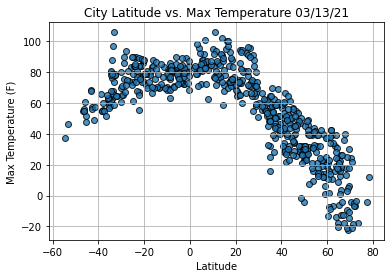

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

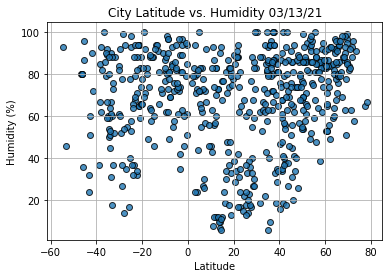

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()